<a href="https://colab.research.google.com/github/SauloFon/ch4/blob/main/Challenge4_IOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Informativos



A coluna de cultura, será transformada em números, onde:

0 - Arroz

1 - Milho

2 - Grão de bico

3 - Feijão roxo

4 - Feijão guandu

5 - Feijão carioca

6 - Feijão verde

7 - Feijão preto

8 - Lentilha

9 - Romã

10 - Banana

11 - Manga

12 - Uva

13 - Melancia

14 - Melão

15 - Maçã

16 - Laranja

17 - Mamão

18 - Coco

19 - Algodão

20 - Juta

21 - Café



* Nitrogenio- Relação do teor de nitrogênio no solo - kg/ha

* Fosforo - Relação do teor de fósforo no solo - kg/ha

* Potassio - Relação do teor de potássio no solo - kg/ha

* Temperatura - Temperatura em graus Celsius

* Umidade - Umidade dom solo relativa em porcentagem

* pH - Valor de pH do solo

*  Chuva - Quantidade de chuva em mm


# Importando algumas bibliotecas

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Carregando e fazendo análise inicial nos dados

In [146]:
df = pd.read_csv('/content/Crop_recommendation.csv')

# Renomeando as colunas

In [147]:
df.rename(columns={'N': 'Nitrogenio',
                   'P': 'Fosforo',
                   'K': 'Potassio',
                   'temperature': 'Temperatura',
                   'humidity': 'Umidade',
                   'ph': 'Ph',
                   'rainfall': 'Chuva(mm)'}, inplace=True)

In [148]:
df.describe()

,Nitrogenio,Fosforo,Potassio,Temperatura,Umidade,Ph,Chuva(mm)
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [150]:
df.head(2200)

,Nitrogenio,Fosforo,Potassio,Temperatura,Umidade,Ph,Chuva(mm),label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Verificando se existem dados sem valor e quantos dos dados da coluna são unicos


In [91]:
print(df.isnull().sum())

Nitrogenio     0
Fosforo        0
Potassio       0
Temperatura    0
Humidade       0
Ph             0
Chuva(mm)      0
label          0
dtype: int64


In [92]:
df.nunique()

,0
Nitrogenio,137
Fosforo,117
Potassio,73
Temperatura,2200
Humidade,2200
Ph,2200
Chuva(mm),2200
label,22


#Transformando a coluna de cultura para números de 0 a 21

In [93]:
df['label'], uniques = pd.factorize(df['label'])
df['label'] = df['label'].astype(int)

In [94]:
X = df.drop('label', axis=1)
y = df['label']

<Axes: >

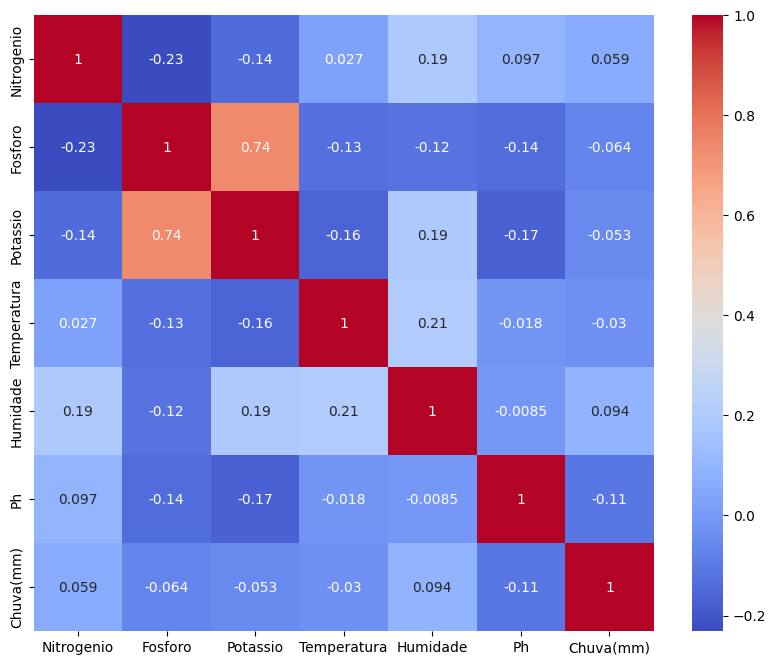

In [95]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot= True, cmap='coolwarm')

# Vizualização através do Boxplot

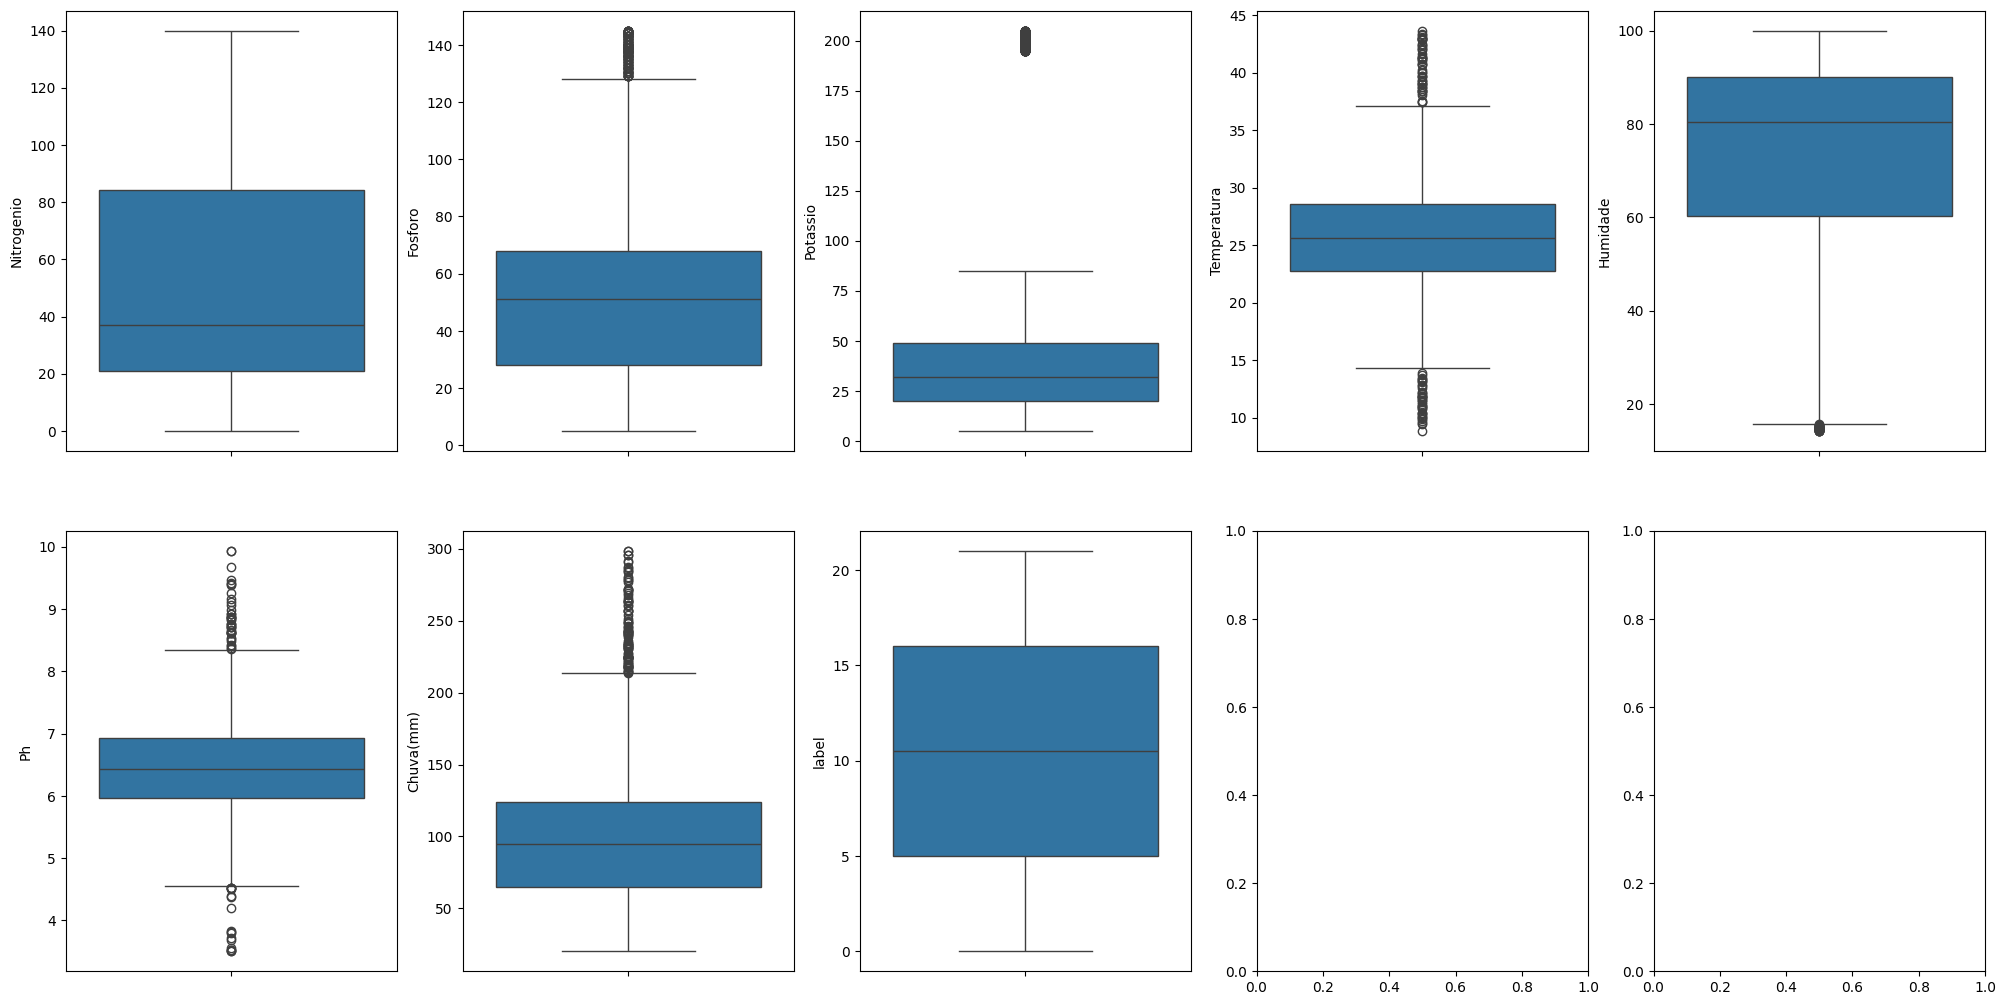

In [96]:
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

# Visualização através de Histogramas

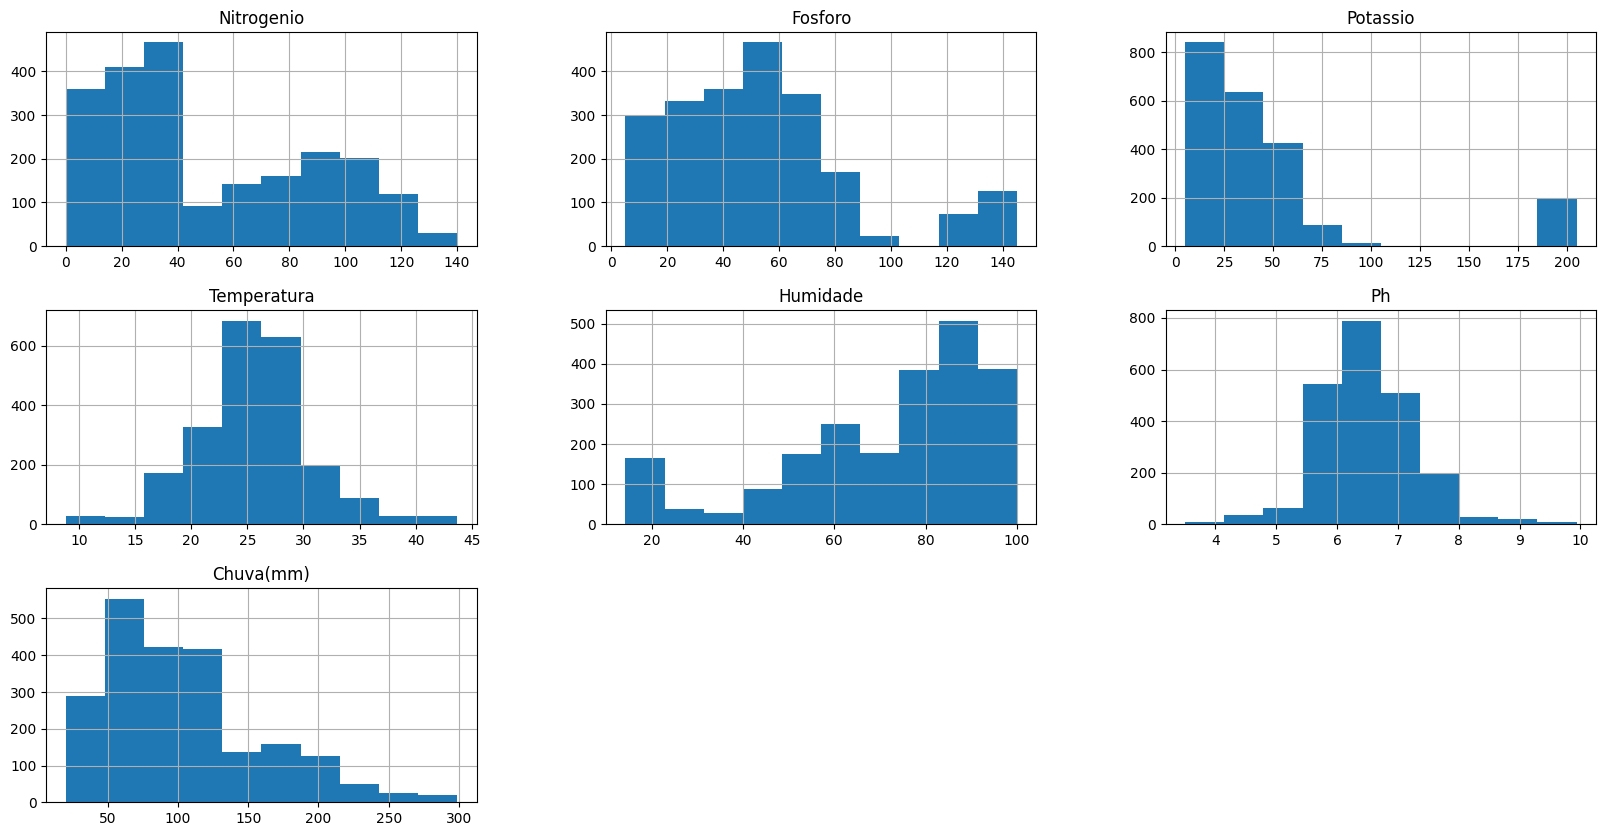

In [97]:
plt.rcParams['figure.figsize'] = [20,10]
X.hist()
plt.show()

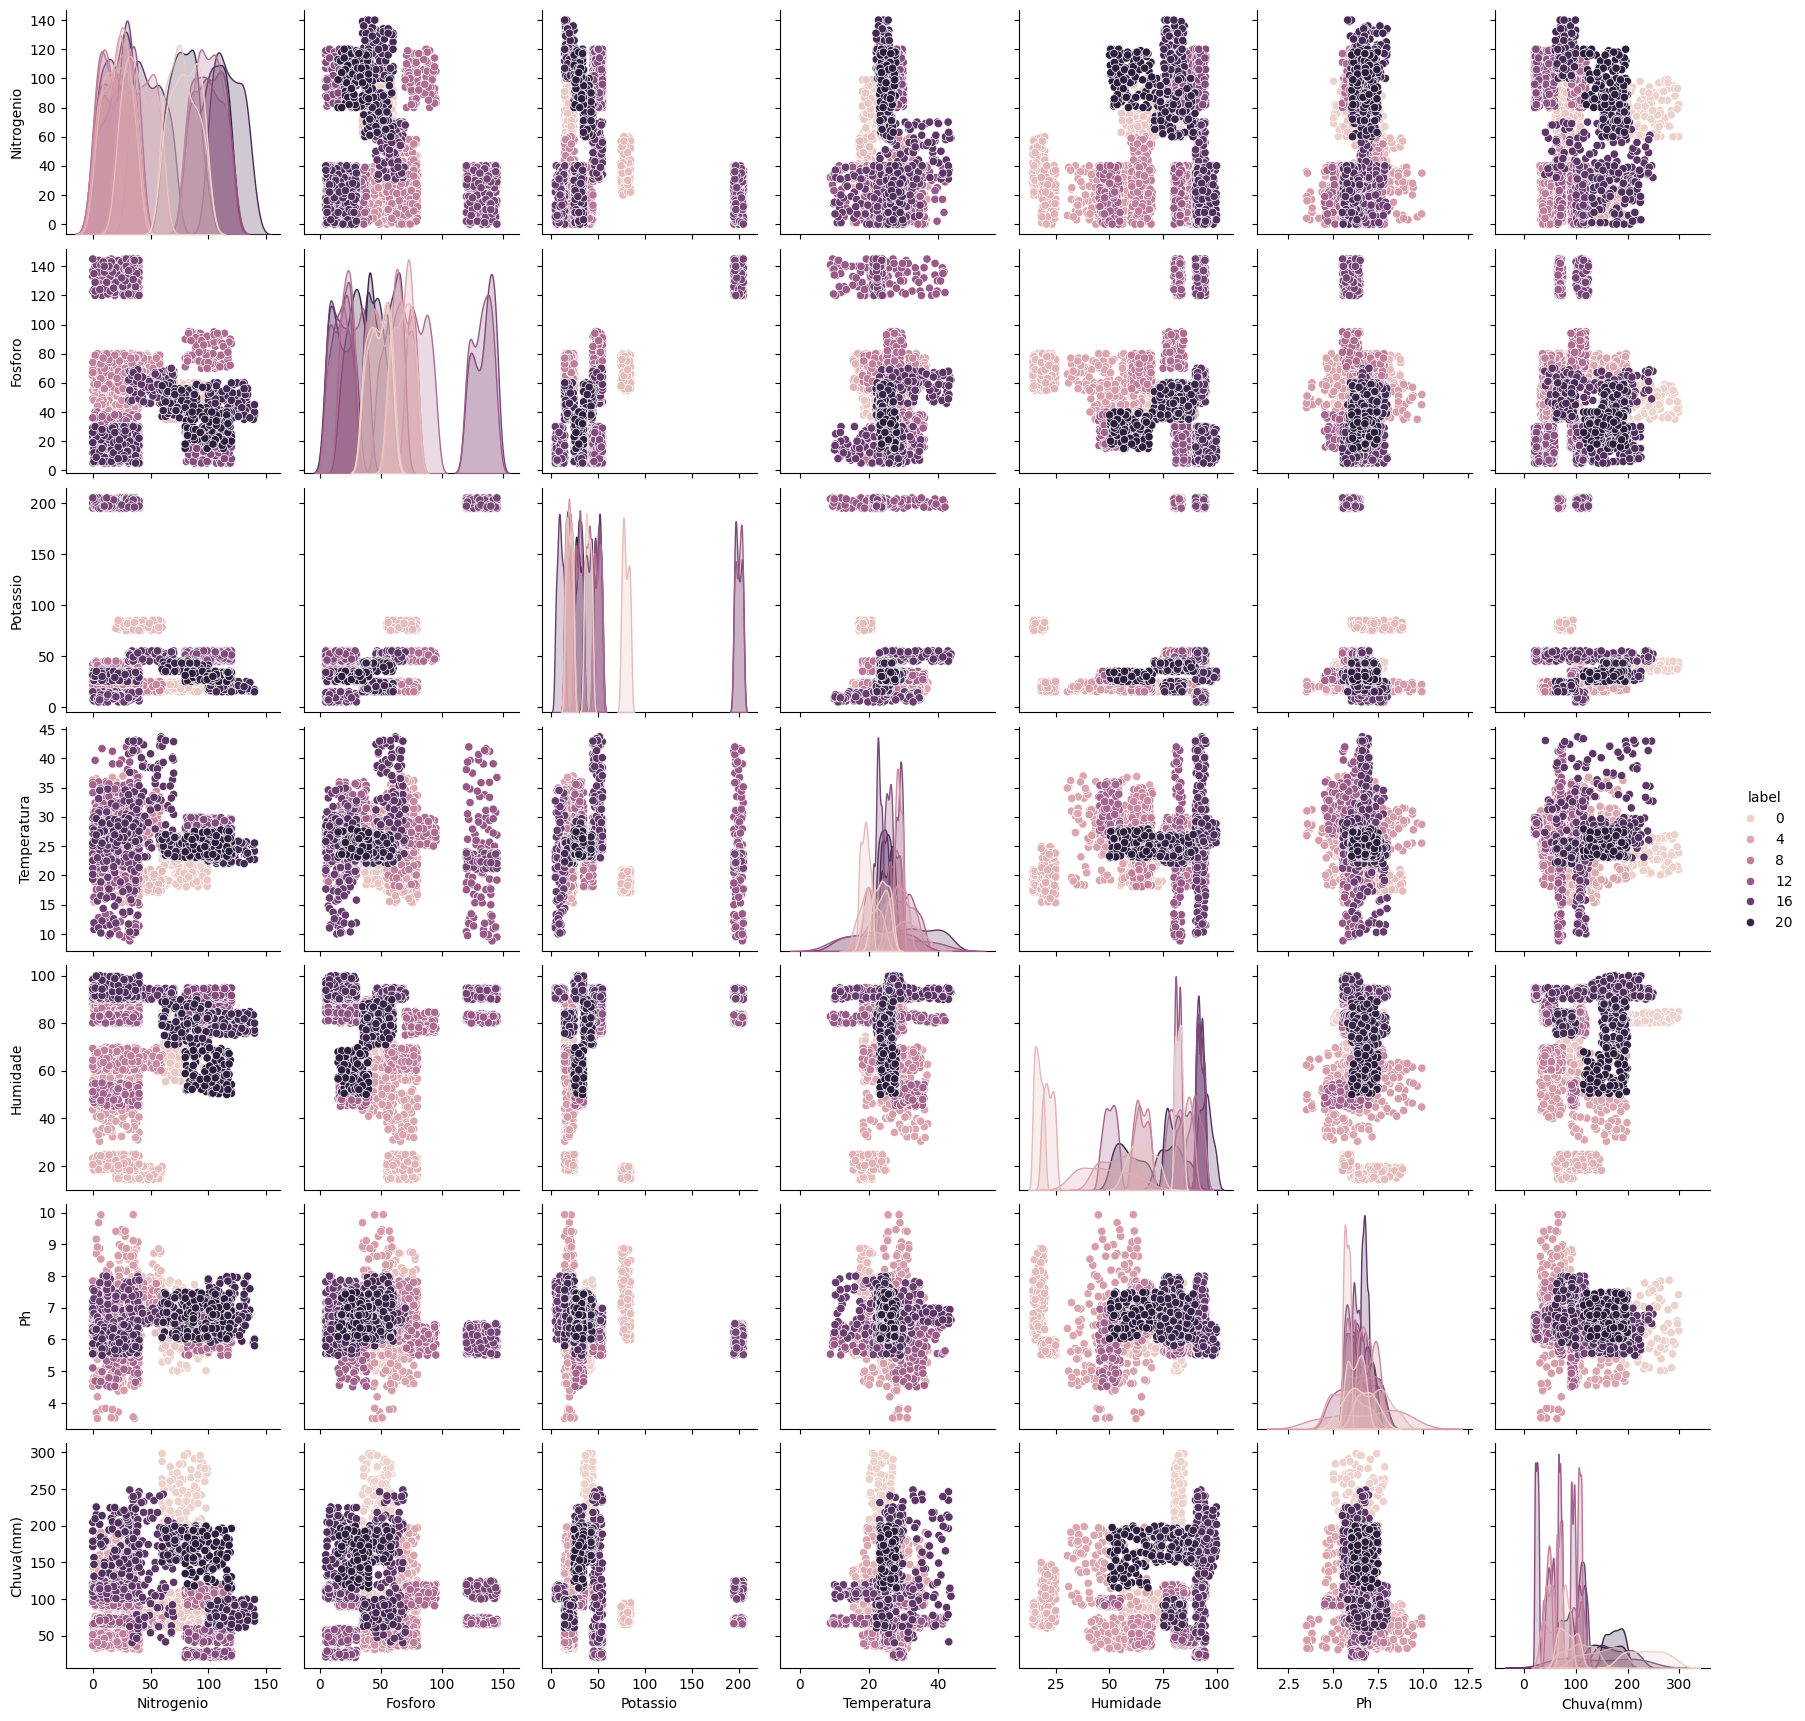

In [52]:
sns.pairplot(df, hue="label")

# Separando dados para teste, usaremos 20% dos dados para teste, e os 80% restantes para treino

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    shuffle = True, random_state = 0)

#Testando com modelo LightGBM

In [54]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.155581
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.155581
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] 

LGBMClassifier()

In [98]:
y_pred=model.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy=accuracy_score(y_pred, y_test)

Precisão do modelo LightGBM: 0.99318


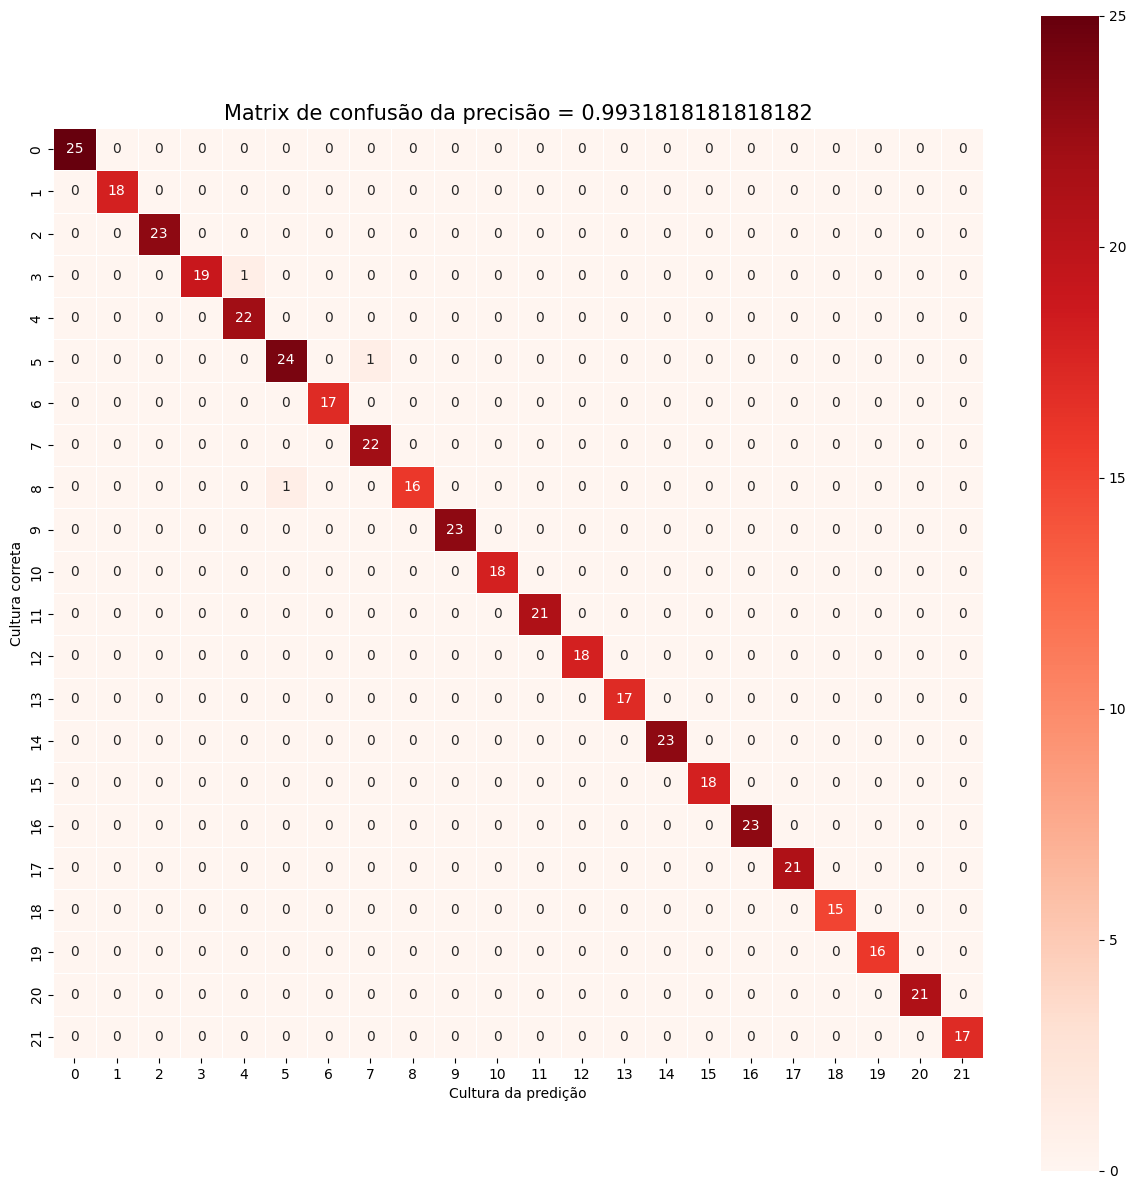

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Cultura correta');
plt.xlabel('Cultura da predição');
all_sample_title = 'Matrix de confusão da precisão = '+str( accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

# Testando um modelo de aprendizado usando Regressão Logística


In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
LG = LogisticRegression()

In [121]:
LG.fit(X_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
LG_accuracy = LG.score(X_test,y_test)

In [126]:
y_pred=LG.predict(X_test)

In [127]:
LG_accuracy

0.9681818181818181

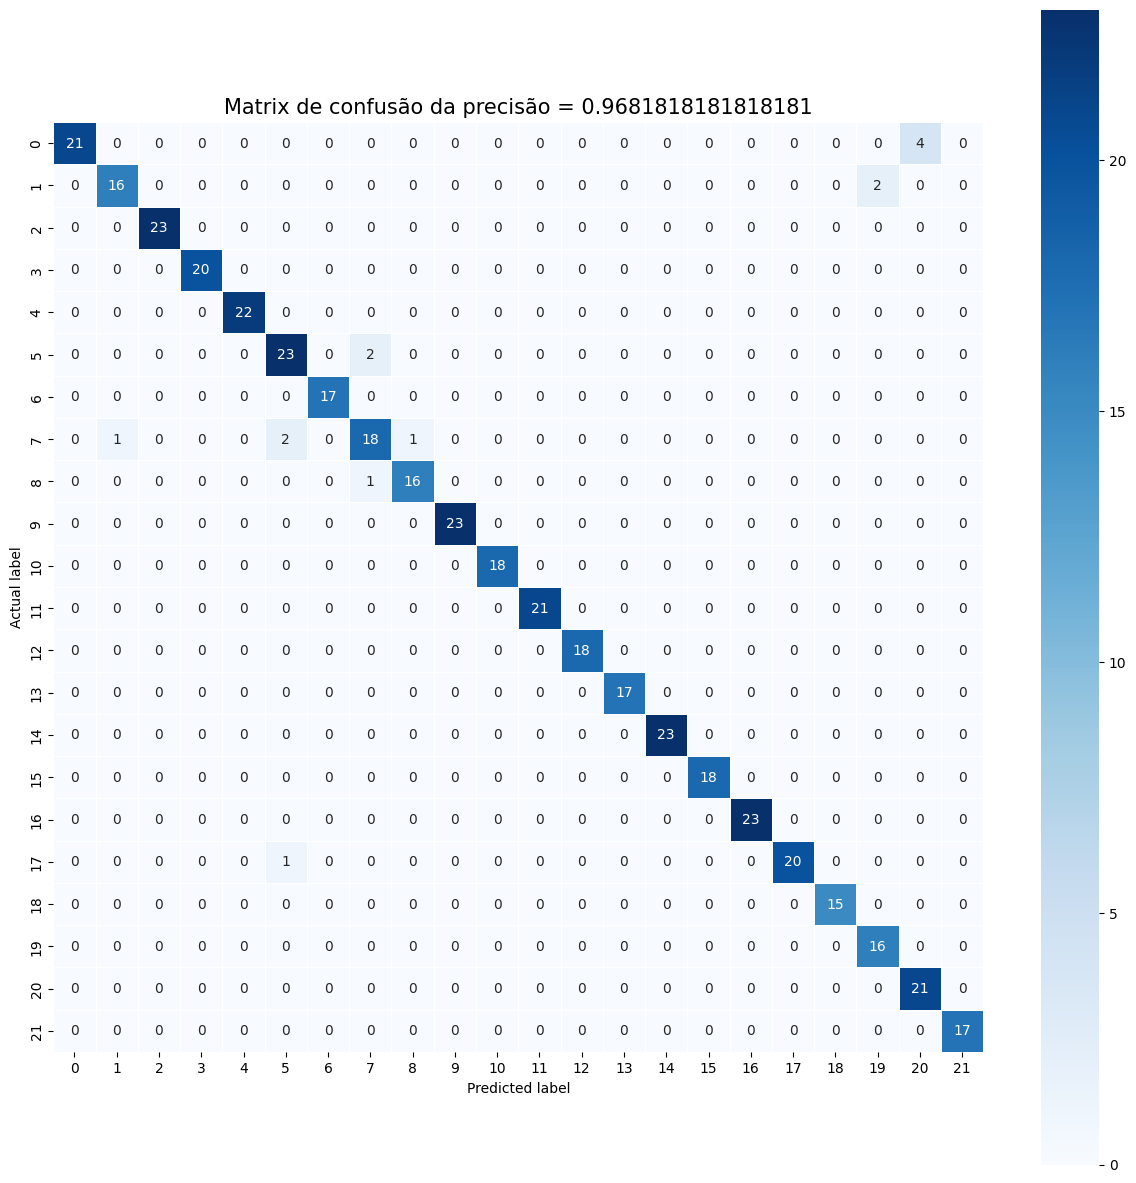

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Cultura correta');
plt.xlabel('Cultura da predição');
all_sample_title = 'Matrix de confusão da precisão = '+str( accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

# Testando um modelo de aprendizado usando Arvore de Decisão




In [130]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
DT = DecisionTreeClassifier()

In [132]:
DT.fit(X_train , y_train)


DecisionTreeClassifier()

In [133]:
predict = DT.predict(X_test)

In [134]:
DT_accuracy = DT.score(X_test,y_test)


In [135]:
DT_accuracy

0.9886363636363636

In [136]:
y_pred=DT.predict(X_test)

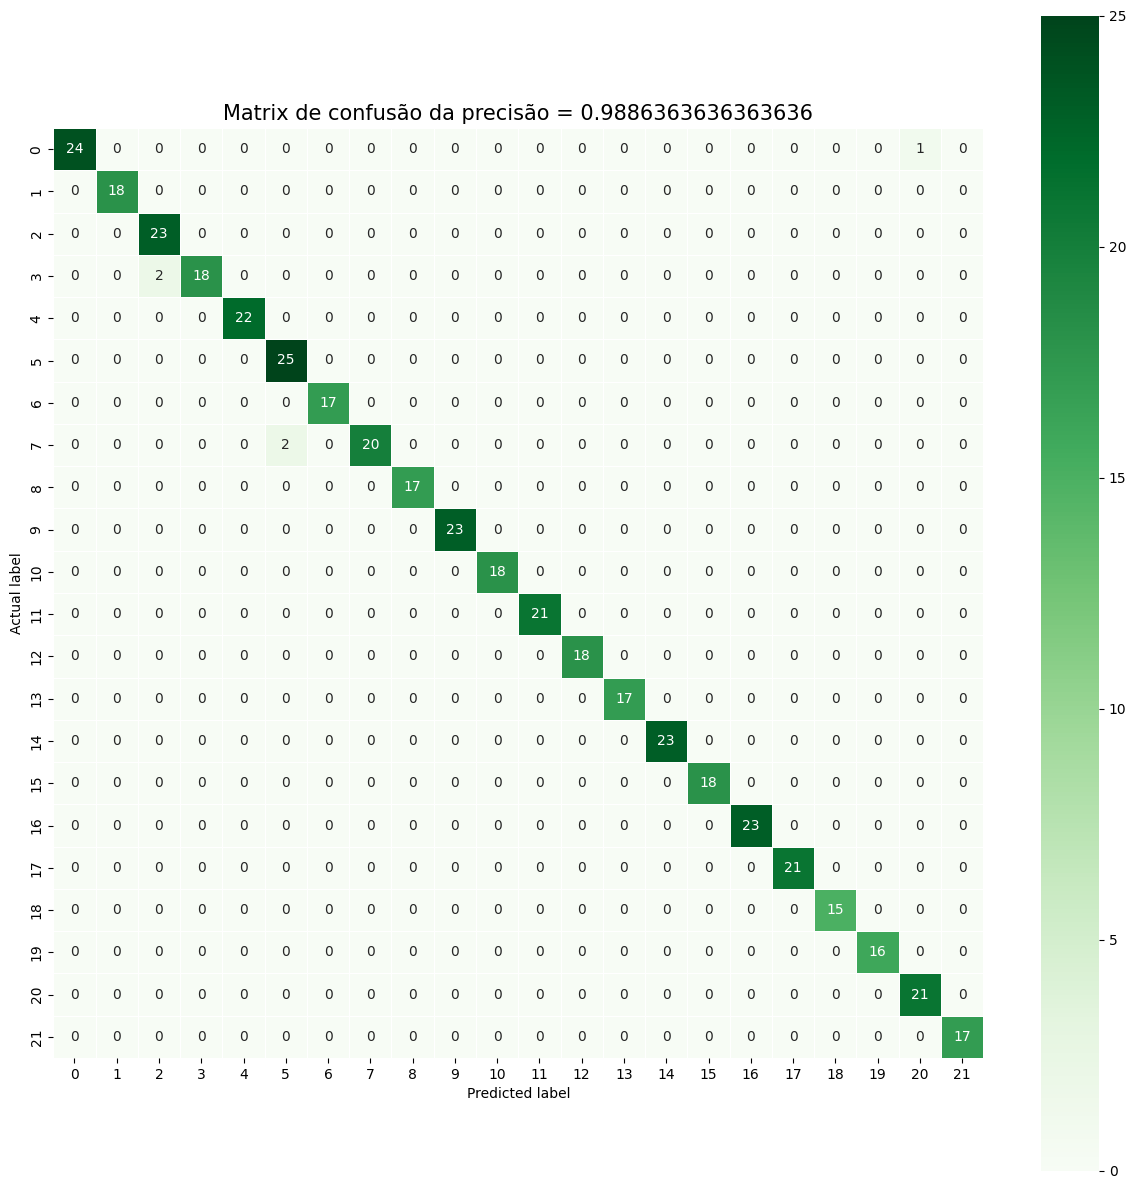

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Cultura correta');
plt.xlabel('Cultura da predição');
all_sample_title = 'Matrix de confusão da precisão = '+str( accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

# Testando um modelo de aprendizado usando Random Forest


In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
RF = RandomForestClassifier()


In [140]:
RF.fit(X_train , y_train)

RandomForestClassifier()

In [141]:
RF_accuracy = RF.score(X_test,y_test)


In [142]:
RF_accuracy

0.9977272727272727

In [144]:
y_pred=RF.predict(X_test)

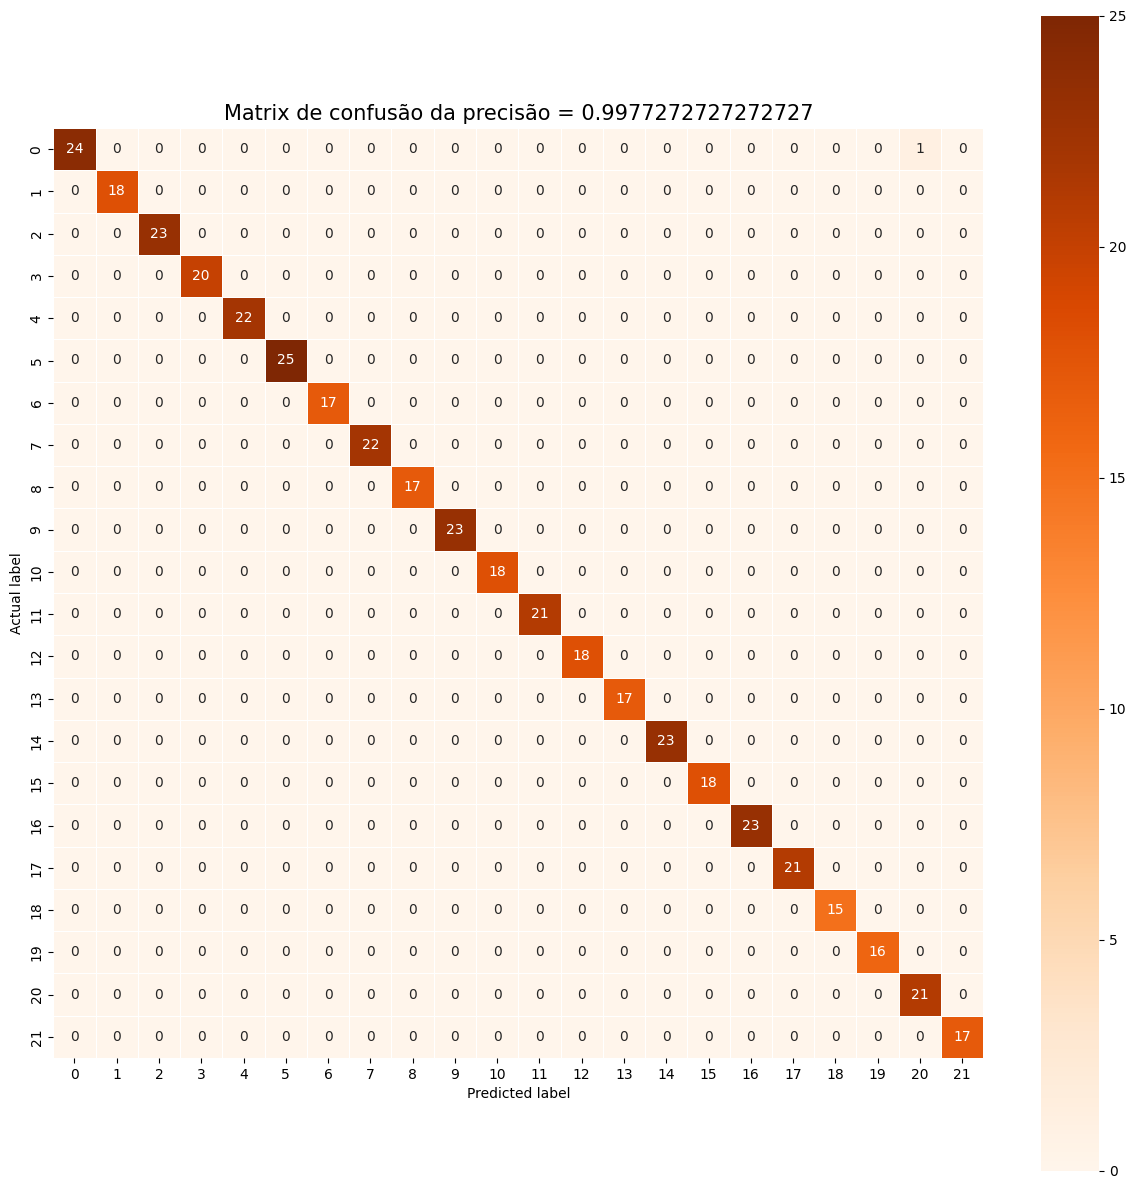

In [145]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Cultura correta');
plt.xlabel('Cultura da predição');
all_sample_title = 'Matrix de confusão da precisão = '+str( accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()